In [143]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.metrics import (classification_report,  roc_auc_score,accuracy_score)

import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv("S05-hw-dataset.csv", sep=",").drop(columns=["client_id"])
df.head(10)

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3000 non-null   int64  
 1   income                          3000 non-null   int64  
 2   years_employed                  3000 non-null   int64  
 3   credit_score                    3000 non-null   int64  
 4   debt_to_income                  3000 non-null   float64
 5   num_credit_cards                3000 non-null   int64  
 6   num_late_payments               3000 non-null   int64  
 7   has_mortgage                    3000 non-null   int64  
 8   has_car_loan                    3000 non-null   int64  
 9   savings_balance                 3000 non-null   int64  
 10  checking_balance                3000 non-null   int64  
 11  region_risk_score               3000 non-null   float64
 12  phone_calls_to_support_last_3m  30

In [146]:
df.describe()

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [147]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Датасет содержит 3000 объектов и 16 признаков, включая целевую переменную. Явных невозможных значений в данных не наблюдается — все минимумы и максимумы находятся в ожидаемых диапазонах для подобных финансово-демографических показателей. Целевая переменная (дефолт) распределена с средним значением 0.41, что указывает на умеренную несбалансированность классов: дефолт наблюдается примерно у 41% клиентов.

In [148]:
X = df.drop(columns=["default"])
y = df["default"]
X.info() # все признаки числовые

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             3000 non-null   int64  
 1   income                          3000 non-null   int64  
 2   years_employed                  3000 non-null   int64  
 3   credit_score                    3000 non-null   int64  
 4   debt_to_income                  3000 non-null   float64
 5   num_credit_cards                3000 non-null   int64  
 6   num_late_payments               3000 non-null   int64  
 7   has_mortgage                    3000 non-null   int64  
 8   has_car_loan                    3000 non-null   int64  
 9   savings_balance                 3000 non-null   int64  
 10  checking_balance                3000 non-null   int64  
 11  region_risk_score               3000 non-null   float64
 12  phone_calls_to_support_last_3m  30

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

base_model = DummyClassifier(strategy="stratified")
base_model.fit(X_train,y_train)

y_pred_base = base_model.predict(X_test)
y_proba_base = base_model.predict_proba(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred_base))
print(f"ROC-AUC: {roc_auc_score(y_true=y_test,y_score=y_proba_base[:,1])}")
print(f"Accuracy: {accuracy_score(y_true=y_test,y_pred=y_pred_base)}")

              precision    recall  f1-score   support

           0       0.56      0.55      0.56       442
           1       0.37      0.38      0.38       308

    accuracy                           0.48       750
   macro avg       0.47      0.47      0.47       750
weighted avg       0.48      0.48      0.48       750

ROC-AUC: 0.4742169595110771
Accuracy: 0.48133333333333334


DummyClassifier(strategy="stratified") просто случайно угадывает классы в соответствии с распределением классов в обучающих данных. Он игнорирует все признаки и фактически "подбрасывает монетку", где вероятность выпадения класса 0 составляет долю этого класса в обучающей выборке, а класса 1 — оставшуюся долю.
Бейзлайн — это "нижний порог" для любой осмысленной модели: если ваша алгоритмическая модель не превосходит эти показатели, она бесполезна.

In [150]:
log_reg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                solver='saga', 
                random_state=42,
                max_iter=1000 
            )
        )
    ]
)
param_grid = {
    "logreg__penalty": ['l1', 'l2'],
    "logreg__C" : np.arange(0.01,11,0.1)
}

grid_search  = GridSearchCV(log_reg_pipeline, param_grid=param_grid, scoring="f1", cv=6,n_jobs=-1,verbose=1,)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший F1:", grid_search.best_score_)

Fitting 6 folds for each of 220 candidates, totalling 1320 fits
Лучшие параметры: {'logreg__C': np.float64(0.31000000000000005), 'logreg__penalty': 'l1'}
Лучший F1: 0.7330361592624217


In [151]:
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f"ROC-AUC: {roc_auc_score(y_true=y_test,y_score=y_proba[:,1])}")
print(f"Accuracy: {accuracy_score(y_true=y_test,y_pred=y_pred)}")

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       442
           1       0.79      0.69      0.74       308

    accuracy                           0.80       750
   macro avg       0.79      0.78      0.78       750
weighted avg       0.80      0.80      0.79       750

ROC-AUC: 0.8650467179878945
Accuracy: 0.796


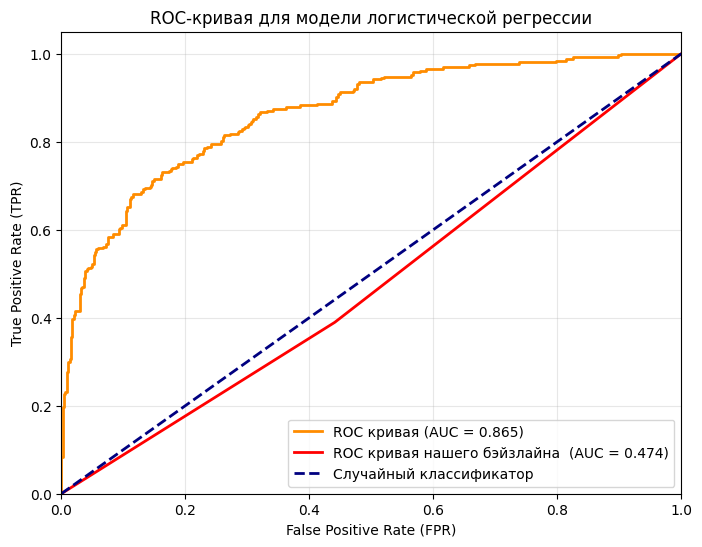

In [155]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_proba_base[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.3f})')
plt.plot(fpr_base, tpr_base, color='r', lw=2, label=f'ROC кривая нашего бэйзлайна  (AUC = {roc_auc_score(y_true=y_test,y_score=y_proba_base[:,1]):.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для модели логистической регрессии')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.savefig('figures/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

In [153]:
print("-----------------------БЕЙЗЛАЙН-----------------------")

print(classification_report(y_true=y_test,y_pred=y_pred_base))
print(f"ROC-AUC: {roc_auc_score(y_true=y_test,y_score=y_proba_base[:,1])}")
print(f"Accuracy: {accuracy_score(y_true=y_test,y_pred=y_pred_base)}")

print("-----------------------ЛОГИСТИЧЕСКАЯ РЕГРЕССИЧ-----------------------")
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f"ROC-AUC: {roc_auc_score(y_true=y_test,y_score=y_proba[:,1])}")
print(f"Accuracy: {accuracy_score(y_true=y_test,y_pred=y_pred)}")

-----------------------БЕЙЗЛАЙН-----------------------
              precision    recall  f1-score   support

           0       0.56      0.55      0.56       442
           1       0.37      0.38      0.38       308

    accuracy                           0.48       750
   macro avg       0.47      0.47      0.47       750
weighted avg       0.48      0.48      0.48       750

ROC-AUC: 0.4742169595110771
Accuracy: 0.48133333333333334
-----------------------ЛОГИСТИЧЕСКАЯ РЕГРЕССИЧ-----------------------
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       442
           1       0.79      0.69      0.74       308

    accuracy                           0.80       750
   macro avg       0.79      0.78      0.78       750
weighted avg       0.80      0.80      0.79       750

ROC-AUC: 0.8650467179878945
Accuracy: 0.796


Бейзлайн (DummyClassifier) предсказывает случайно, не используя признаки, и даёт accuracy 0.48 и ROC-AUC 0.47. Логистическая регрессия, обученная на данных, улучшила accuracy до 0.80 (+0.32) и ROC-AUC до 0.87 (+0.40), что подтверждает ценность признаков для прогноза дефолта.

Лучший результат получен с L1-регуляризацией и C=0.31. Увеличение C ослабляет регуляризацию, что может вести к переобучению, а уменьшение — к недообучению; выбранное значение балансирует модель.

Выводы:

Логистическая регрессия с подобранными параметрами — эффективная и интерпретируемая модель для этой задачи.

L1-регуляризация с умеренным C улучшает обобщающую способность, отбирая ключевые признаки.